# Lab: Regressions

In this lab we will introduce simple linear regression in Python. We are going to use `Scikit Learn` library. More information about the library you can find here:
<https://www.tutorialspoint.com/scikit_learn/scikit_learn_linear_regression.htm>




## Sea Ice Dataset

The script below is the based on the Sea Ice dataset from @igual_regression_2017.
You can find the data here: <ftp://sidads.colorado.edu/DATASETS/NOAA/>
or read more about the project here: <https://nsidc.org/data/seaice_index>

This notebook will walk you through an example of a simple linear regression and the other notebook "IM939 Lab 3 - Linear Regression Exercise.ipynb" will include the example of a multiple linear regression, too.

## Simple and Multiple Linear Regression

In the **linear model** the response $\textbf{y}$ depends linearly from the covariates $\textbf{x}_i$.

In the **simple** linear regression, with a single variable, we described the relationship between the predictor and the response with a straight line. The general linear model:
$$ \textbf{y}  =  a_0+ a_1 \textbf{x}_1 $$

The parameter $a_0$ is called the *constant* term or the *intercept*.

In the case of **multiple** linear regression we extend this idea by fitting a m-dimensional hyperplane to our m predictors.

$$ \textbf{y}  =  a_1 \textbf{x}_1  + \dots + a_m \textbf{x}_{m} $$

The $a_i$ are termed the *parameters* of the model or the coefficients.

## Ordinary Least Squares

Ordinary Least Squares (OLS) is the simplest and most common **estimator** in which the coefficients $a$'s 
of the simple linear regression: $\textbf{y} = a_0+a_1 \textbf{x}$, 
are chosen to minimize the **square of the distance between the predicted values and the actual values**. 

$$ ||a_0 + a_1 \textbf{x} -  \textbf{y} ||^2_2 = \sum_{j=1}^n (a_0+a_1 x_{j} -  y_j )^2,$$ 

This expression is often called **sum of squared errors of prediction (SSE)**.


## Case study: Climate Change and Sea Ice Extent

The question: Has there been a decrease in the amount of ice in the last years?

### Reading Data

There are five steps. First, let's load the data that is already in the `data` folder: `SeaIce.txt`. It is a text file, specifically is a `Tab` separated file where each `Tab` delimites the following columns:

- `Year`:	4-digit year
- `mo`:	1- or 2-digit month
- `data_type`:	Input data set (Goddard/NRTSI-G)
- `region`:	Hemisphere that this data covers (N: Northern; S: Southern)
- `extent`:	Sea ice extent in millions of square km
- `area`:	Sea ice area in millions of square km

Once we upload the data, we can create a `DataFrame`[^dataframe-reminder] using Pandas. 

[^dataframe-reminder]: A reminder what is DataFrame: <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html>

In [1]:
import pandas as pd
ice = pd.read_csv('data/raw/SeaIce.txt', 
                  delim_whitespace=True)

print('shape:', ice.shape) #this returns number of rows and columns in a dataset
ice.head() 

shape: (424, 6)


,year,mo,data_type,region,extent,area
0,1979,1,Goddard,N,15.54,12.33
1,1980,1,Goddard,N,14.96,11.85
2,1981,1,Goddard,N,15.03,11.82
3,1982,1,Goddard,N,15.26,12.11
4,1983,1,Goddard,N,15.10,11.92


We can compute the mean for that interval of time (1981 through 2010), before data cleaning.

In [2]:
ice.mean(numeric_only = True)

year      1996.000000
mo           6.500000
extent     -35.443066
area       -37.921108
dtype: float64

Did we receive a negative mean...?

### Data visualisation to explore data

Do you remember Seaborn? 
We will use lmplot() function from Seaborn to explore linear relationship of different forms, e.g. relationship between the month of the year (variable) and extent (responses):

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Text(0, 0.5, 'Extent')

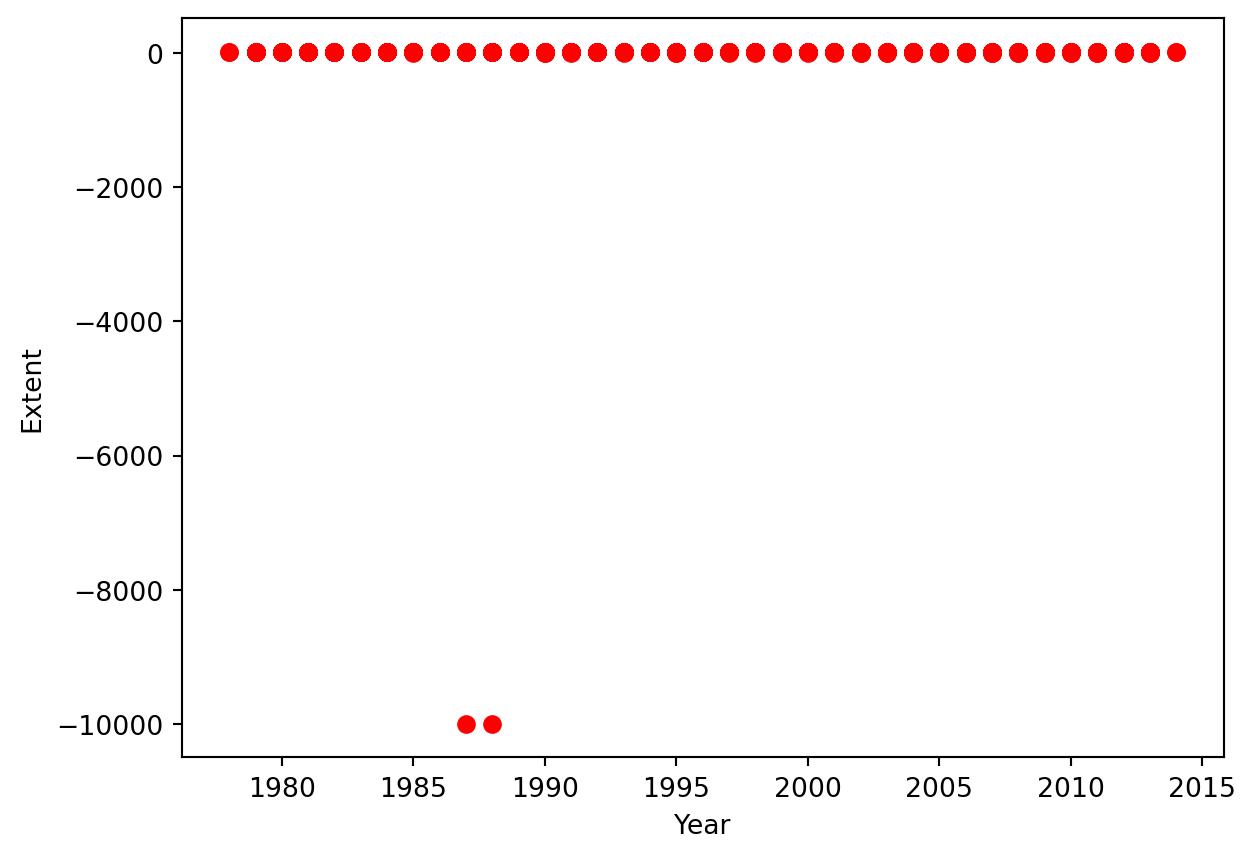

In [4]:
# Visualize the data
x = ice.year
y = ice.extent
plt.scatter(x, y, color = 'red')
plt.xlabel('Year')
plt.ylabel('Extent')

We detect some outlier or missing data.
we are going to use function np.unique and find the unique elements of an array.

In [5]:
?np.unique

In [6]:
print ('Different values in data_type field:', np.unique(ice.data_type.values))   # there is a -9999 value!

Different values in data_type field: ['-9999' 'Goddard' 'NRTSI-G']


Let's see what type of data we have, other than the ones printed above 

In [7]:
print (ice[(ice.data_type != 'Goddard')
          & (ice.data_type != 'NRTSI-G')])

     year  mo data_type region  extent    area
9    1988   1     -9999      N -9999.0 -9999.0
397  1987  12     -9999      N -9999.0 -9999.0


Data cleaning: we checked all the values and notice -9999 values in data_type field which should contain 'Goddard' or 'NRTSI-G' (some type of input dataset).
So we clean them by removing these instances  

shape: (422, 6)


Text(0, 0.5, 'Extent')

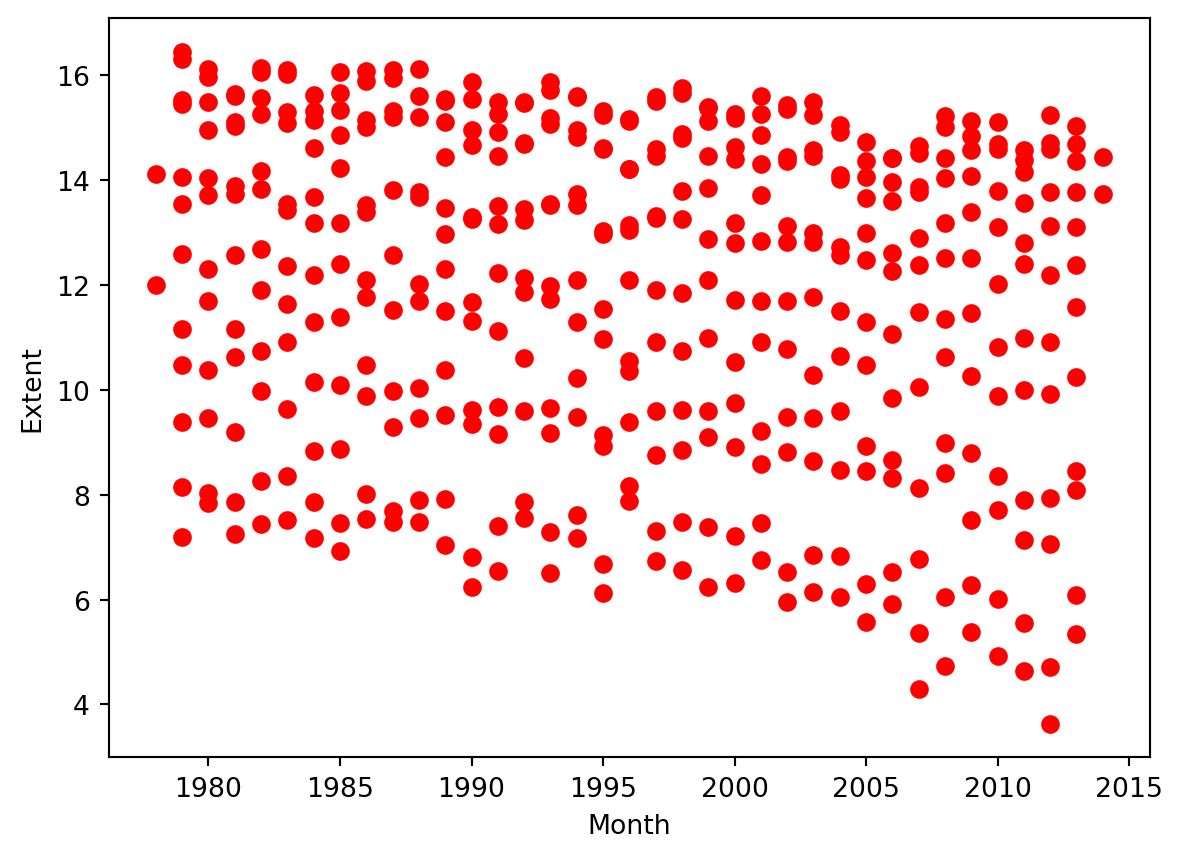

In [8]:
# We can easily clean the data now:
ice2 = ice[ice.data_type != '-9999']
print ('shape:', ice2.shape)
# And repeat the plot
x = ice2.year
y = ice2.extent
plt.scatter(x, y, color = 'red')
plt.xlabel('Month')
plt.ylabel('Extent')

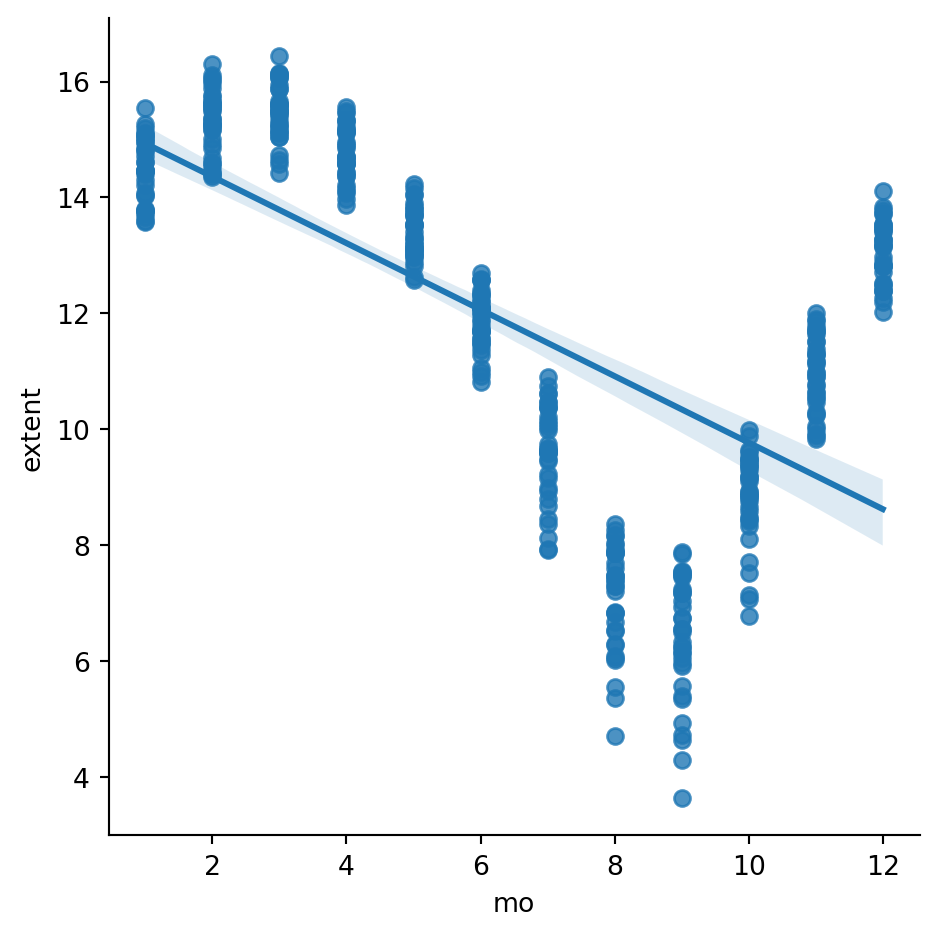

In [9]:
sns.lmplot(data = ice2, x = "mo", y = "extent")

Above you can see ice extent data by month.
You can see a monthly fluctuation of the sea ice extent, as would be expected for the different seasons of the year. In order to run regression, and avoid this fluctuation we can normalize data. This will let us see the evolution of the extent over the years.

### Normalization


The `lmplot()` function from the Seaborn module is intended for exploring linear relationships of different forms in multidimensional datesets. Input data must be in a Pandas DataFrame. To plot them, we provide the predictor and response variable names along with the dataset



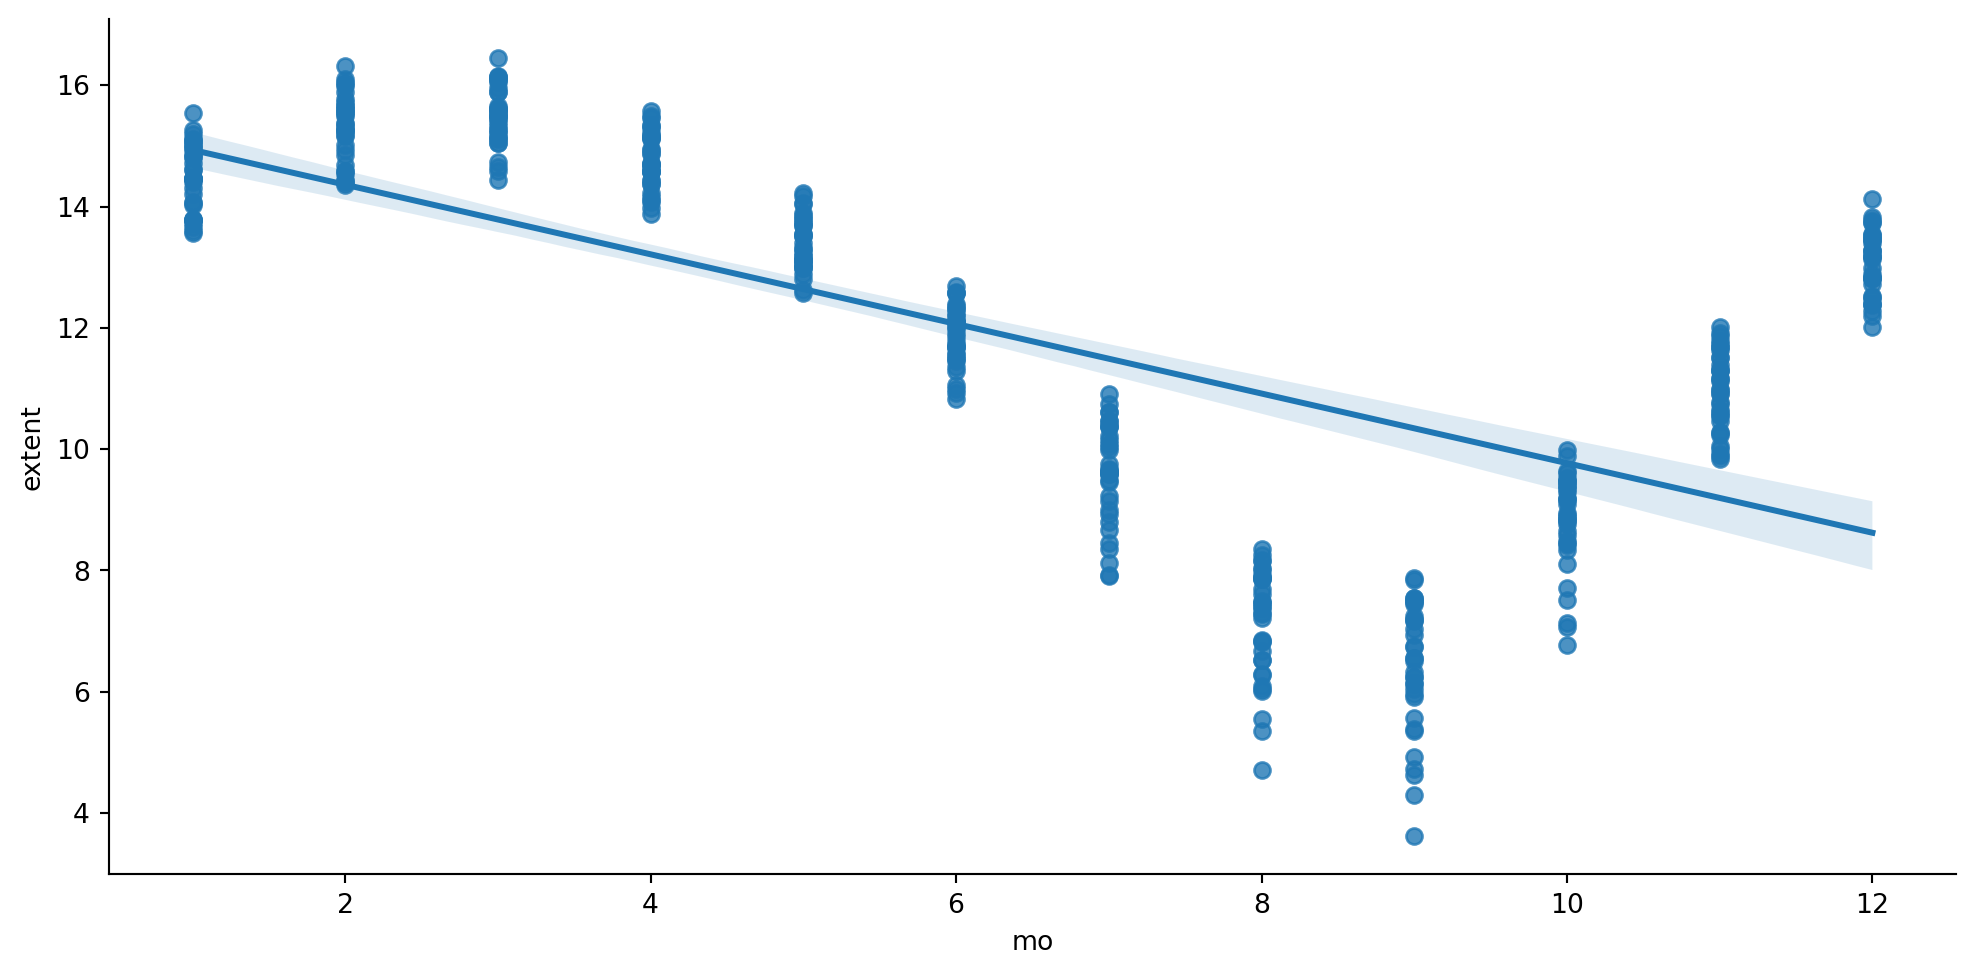

In [10]:
#| column: page-right

sns.lmplot(ice2, x = "mo", y = "extent", height = 5.2, aspect = 2);

# Uncomment below to save the resulting plot.
#plt.savefig("figs/CleanedByMonth.png", dpi = 300, bbox_inches = 'tight')

In [12]:
# Compute the mean for each month.
grouped = ice2.groupby('mo')
month_means = grouped.extent.mean()
month_variances = grouped.extent.var()
print ('Means:', month_means)
print ('Variances:',month_variances)

Means: mo
1     14.479429
2     15.298889
3     15.491714
4     14.766000
5     13.396000
6     11.860000
7      9.601143
8      7.122286
9      6.404857
10     8.809143
11    10.964722
12    13.059429
Name: extent, dtype: float64
Variances: mo
1     0.304906
2     0.295804
3     0.237209
4     0.215378
5     0.189901
6     0.247918
7     0.679175
8     0.824577
9     1.143902
10    0.630361
11    0.412511
12    0.284870
Name: extent, dtype: float64


To capture variation per month, we can compute mean for the i-th interval of time (using 1979-2014) and subtract it from the set of extent values for that month . This can be converted to a relative pecentage difference by dividing it by the total avareage (1979-2014) and multiplying by 100.

/var/folders/7v/zl9mv52s3ls94kntlt_l9ryh0000gq/T/ipykernel_59503/751478846.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ice2.extent[ice2.mo == i+1] = 100*(ice2.extent[ice2.mo == i+1] - month_means[i+1])/month_means.mean().copy()
/var/folders/7v/zl9mv52s3ls94kntlt_l9ryh0000gq/T/ipykernel_59503/751478846.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ice2.extent[ice2.mo == i+1] = 100*(ice2.extent[ice2.mo == i+1] - month_means[i+1])/month_means.mean().copy()
/var/folders/7v/zl9mv52s3ls94kntlt_l9ryh0000gq/T/ipykernel_59503/751478846.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

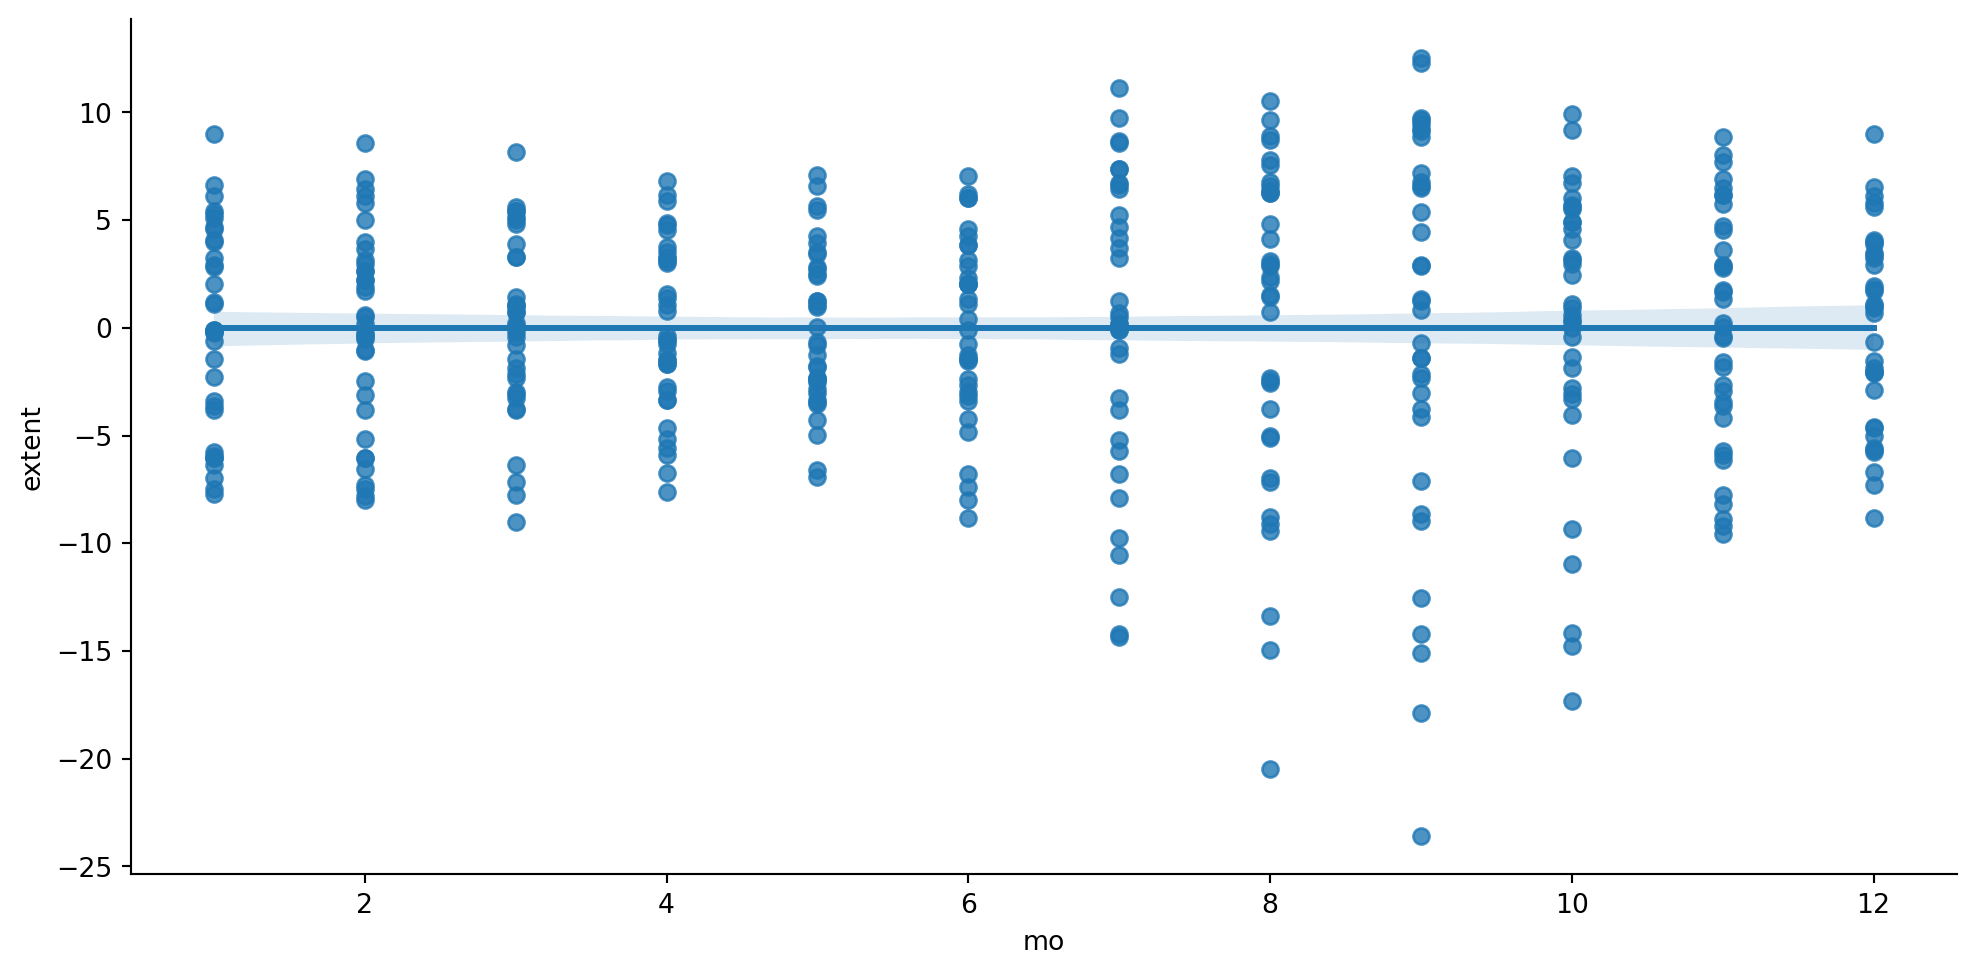

In [13]:
# Data normalization
for i in range(12):
    ice2.extent[ice2.mo == i+1] = 100*(ice2.extent[ice2.mo == i+1] - month_means[i+1])/month_means.mean().copy()
    
sns.lmplot(ice2 , x = "mo", y = "extent", height = 5.2, aspect = 2);
plt.savefig("figs/IceExtentNormalizedByMonth.png", dpi = 300, bbox_inches = 'tight')

In [14]:
print ('mean:', ice2.extent.mean())
print ('var:', ice2.extent.var())

mean: -7.745252569896827e-16
var: 31.983239774968798


Let us consider the entire year

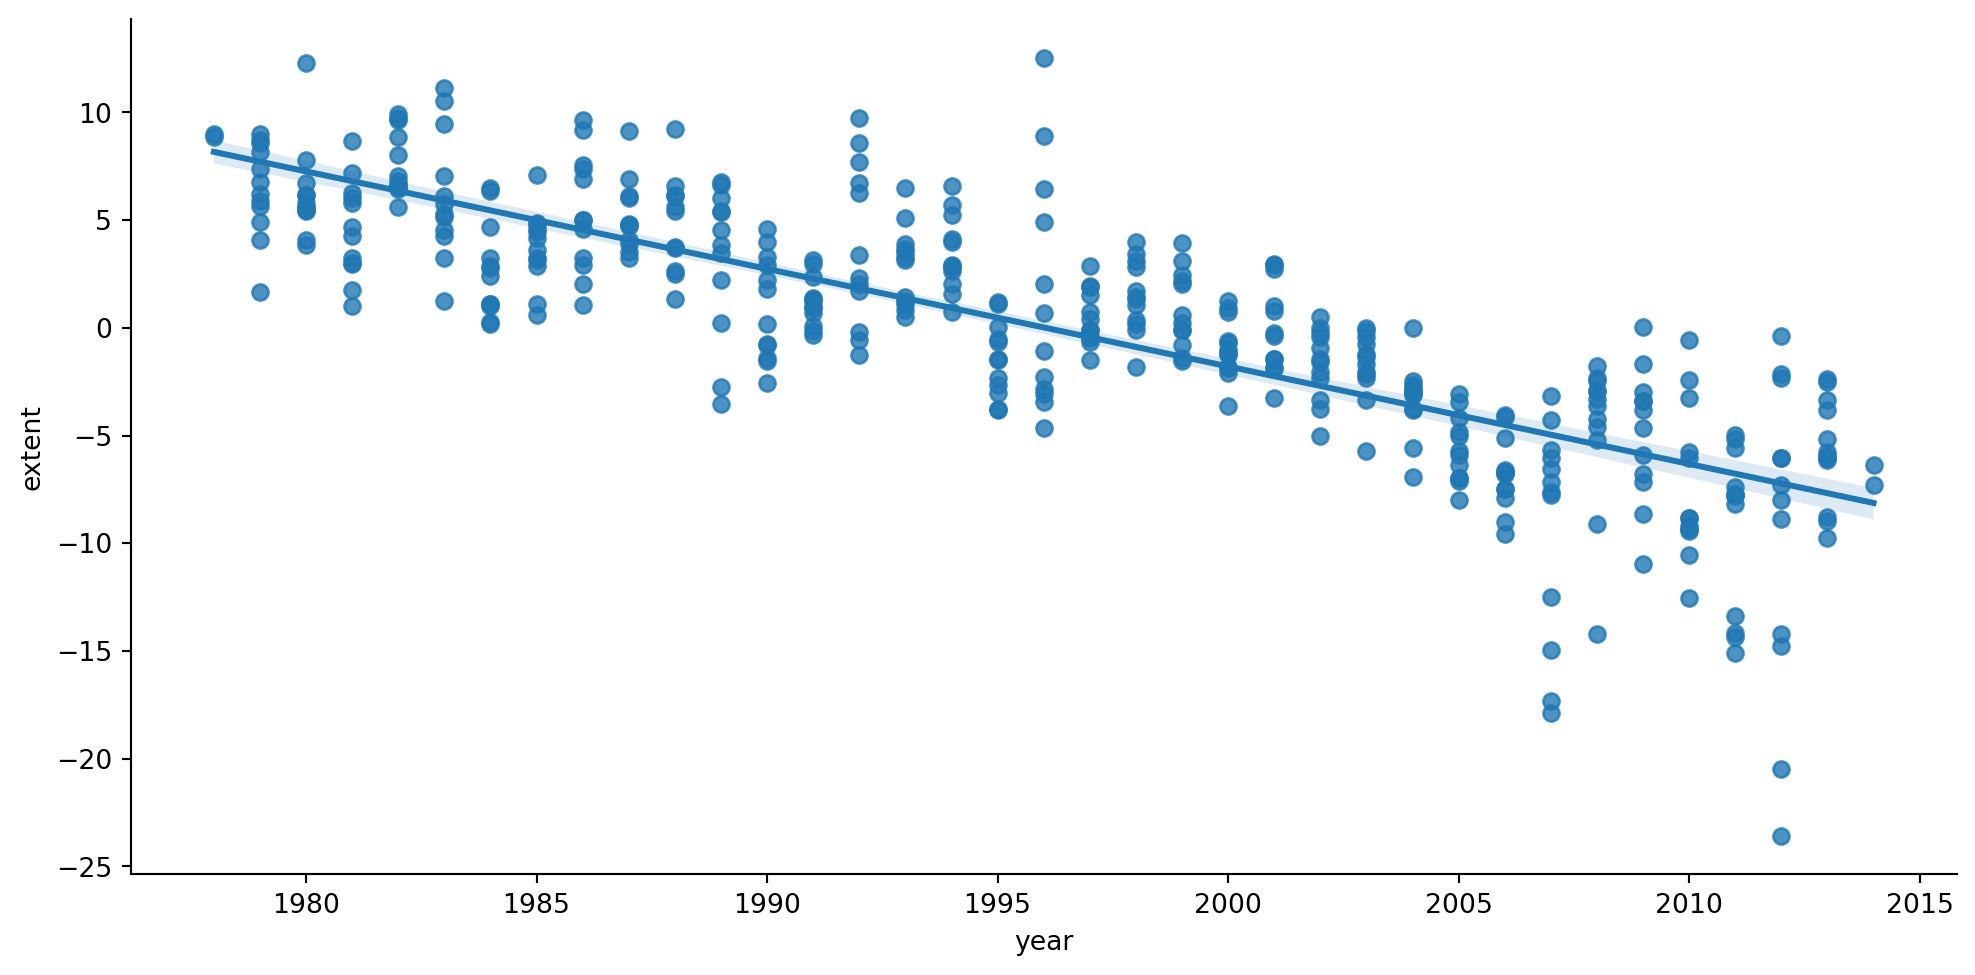

In [15]:
sns.lmplot(ice2, x = "year", y = "extent", height = 5.2, aspect = 2);
plt.savefig("figs/IceExtentAllMonthsByYearlmplot.png", dpi = 300, bbox_inches = 'tight')

### Pearson's correlation

Let's calculate Pearson's correlation coefficient and the p-value for testing non-correlation.

In [16]:
import scipy.stats
scipy.stats.pearsonr(ice2.year.values, ice2.extent.values)

PearsonRResult(statistic=-0.8183500709897178, pvalue=4.4492318168687107e-103)

### Simple OLS

We can also compute the trend as a simple linear regression (OLS) and quantitatively evaluate it.

For that we use using **Scikit-learn**, library that provides a variety of both supervised and unsupervised machine learning techniques.
Scikit-learn provides an object-oriented interface centered around the concept of an Estimator. 
The <code>Estimator.fit</code> method sets the state of the estimator based on the training data. Usually, the data is comprised of a two-dimensional numpy array $X$ of shape <code>(n_samples, n_predictors)</code> that holds the so-called feature matrix and a one-dimensional numpy array $\textbf{y}$ that holds the responses. Some estimators allow the user to control the fitting behavior. 
For example, the <code>sklearn.linear_model.LinearRegression</code> estimator allows the user to specify whether or not to fit an intercept term. This is done by setting the corresponding constructor arguments of the estimator object.
During the fitting process, the state of the estimator is stored in instance attributes that have a trailing underscore ('_'). For example, the coefficients of a LinearRegression estimator are stored in the attribute coef_.

Estimators that can generate predictions provide a ``Estimator.predict`` method. 
In the case of regression, ``Estimator.predict`` will return the predicted regression values, $\hat{\textbf{y}}$. 

In [17]:
from sklearn.linear_model import LinearRegression

est = LinearRegression(fit_intercept = True)

x = ice2[['year']]
y = ice2[['extent']]

est.fit(x, y)

print("Coefficients:", est.coef_)
print ("Intercept:", est.intercept_)

Coefficients: [[-0.45275459]]
Intercept: [903.71640207]


We can evaluate the model fitting by computing the mean squared error ($MSE$) and the coefficient of determination ($R^2$) of the model.
The coefficient $R^2$ is defined as $(1 - \textbf{u}/\textbf{v})$, where $\textbf{u}$ is the residual sum of squares $\sum (\textbf{y} - \hat{\textbf{y}})^2$ and $\textbf{v}$ is the regression sum of squares $\sum (\textbf{y} - \bar{\textbf{y}})^2$, where $\bar{\textbf{y}}$ is the mean.
The best possible score for $R^2$ is 1.0: lower values are worse.
These measures can provide a quantitative answer to the question we are facing: Is there a negative trend in the evolution of sea ice extent over recent years?

MSE: 10.539131639803488
R^2: 0.5067870382100226
var: extent    31.98324
dtype: float64


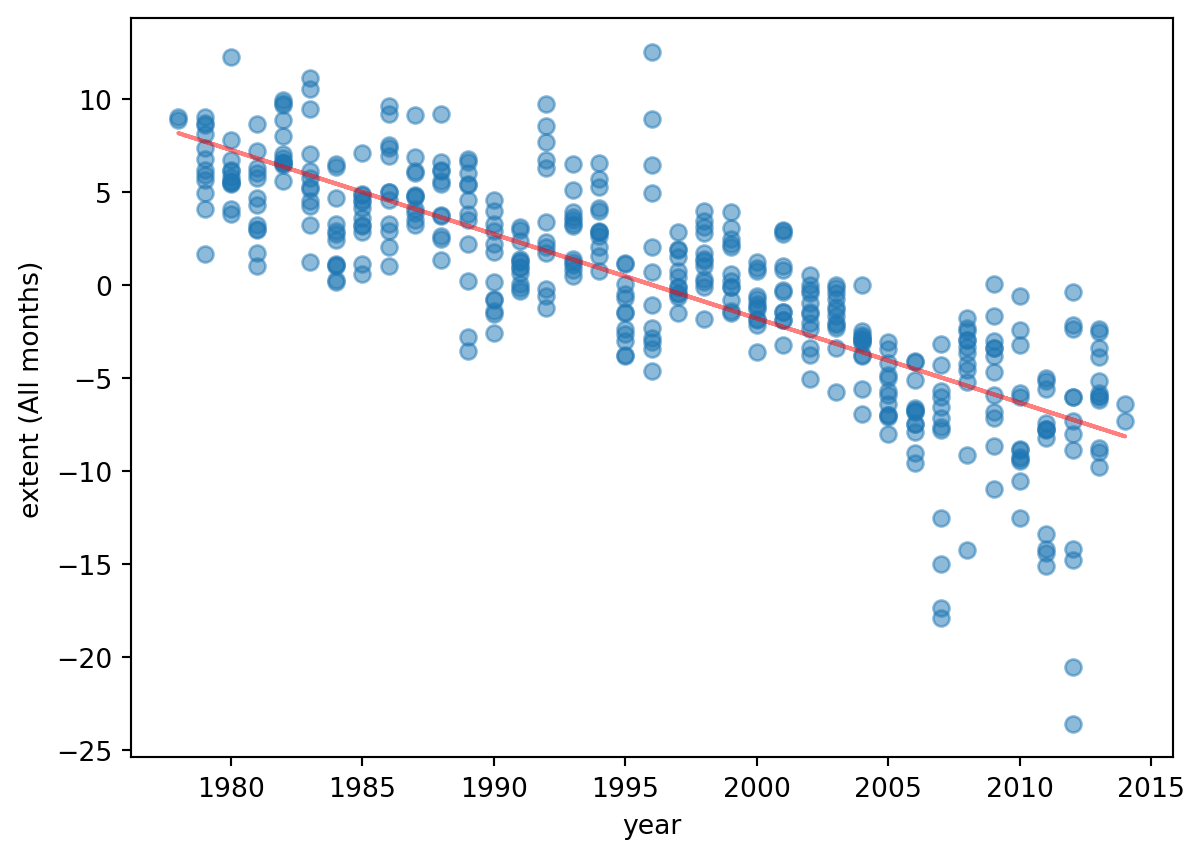

In [18]:
from sklearn import metrics

# Analysis for all months together.
x = ice2[['year']]
y = ice2[['extent']]
model = LinearRegression()
model.fit(x, y)
y_hat = model.predict(x)
plt.plot(x, y,'o', alpha = 0.5)
plt.plot(x, y_hat, 'r', alpha = 0.5)
plt.xlabel('year')
plt.ylabel('extent (All months)')
print ("MSE:", metrics.mean_squared_error(y_hat, y))
print ("R^2:", metrics.r2_score(y_hat, y))
print ("var:", y.var())
plt.savefig("figs/IceExtentLinearRegressionAllMonthsByYearPrediction.png", dpi = 300, bbox_inches = 'tight')

We can conclude that the data show a long-term negative trend in recent years.

MSE: 3.8395160752867565
R^2: 0.7810636041396216


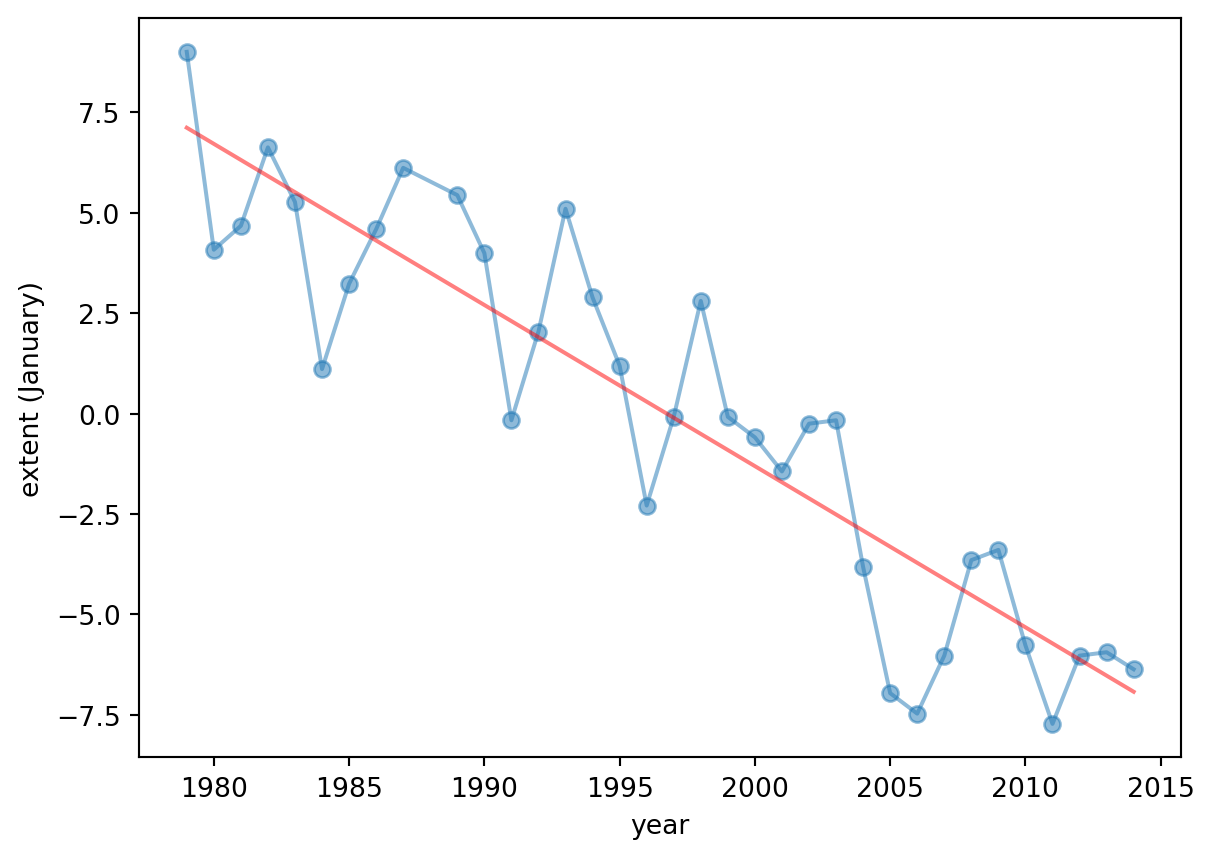

In [19]:
# Analysis for a particular month.
#For January
jan = ice2[ice2.mo == 1];

x = jan[['year']]
y = jan[['extent']]

model = LinearRegression()
model.fit(x, y)

y_hat = model.predict(x)

plt.figure()
plt.plot(x, y,'-o', alpha = 0.5)
plt.plot(x, y_hat, 'r', alpha = 0.5)
plt.xlabel('year')
plt.ylabel('extent (January)')

print ("MSE:", metrics.mean_squared_error(y_hat, y))
print ("R^2:", metrics.r2_score(y_hat, y))

We can also estimate the extent value for 2025. For that we use the function predict of the model.

In [20]:
X = np.array(2025) 
y_hat = model.predict(X.reshape(-1, 1))
j = 1 # January
# Original value (before normalization)
y_hat = (y_hat*month_means.mean()/100) + month_means[j]
print ("Prediction of extent for January 2025 (in millions of square km):", y_hat)

Prediction of extent for January 2025 (in millions of square km): [[13.14449923]]


/Users/u2071219/anaconda3/envs/IM939/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Prediction of extent for January 2025 (in millions of square km): [ 13.14449923]